In [37]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-white')

# 1. PWR

## 1.0 Reactor Data

### PWR - CLASS

#### Reactor
    - Heavy mass: 72 tons
    - Thermal power: 3 GWth
    - Loading factor: 75%
    - Irradiation time: 3 years that correspond to a burn-up closed to 34 GWd/t
#### FLM
    - 17x17 infinite assembly
    - Neural network prediction of the k$_{inf}$
    - k$_{threshold}$ is 1.034


### PWR - Tr_Evol

#### Reactor
    - Thermal_power_(GW) : 3.0
    - Electrical_power_(GW) : 1.0
    - Load_factor : 0.9
    - Core_mass_(tHM) : 72.0
    - Burn_up_(GWd/tHM) : 41
    - Pu content for FF : 5%
#### FLM
    - Pu Equivalent

### PWR - ANICCA

#### Reactor
    - Fuel Heavy Mass: 22.2908 t/years
    - 38.156 GWd/t
    - Load Factor : 90%
    - Thermal Power : 3 GWth
    - Cycle Time : 1390 EFPD = 1390/0.9 days = 4.22846 years
    
#### FLM
    - Pu Equivalent
    
### PWR - Cyclus

#### Reactor
    - Heavy mass: 72 tons
    - Thermal power: 2.7 GWth
    - BU: 41.09 GWd/t
    - Loading factor: 100%    
#### FLM
    - Pu Eq Baker And Ross
    

### Reactor Calculation Data

In [14]:
PWR_CLASS_CT = 3
PWR_ANICCA_CT = 3 # TO ASK !!! We don't have irradiated mass
PWR_TrEvol = 3 # TO CALCULATE FROM DATA

## 1.1 Loading Data files and Variable declaration
### NICO / CLASS

In [15]:
def load_class_pwr_data(fml_file = 'NICO/PWR_MOX_FLM.dat',  ff_file = 'NICO/PWR_MOX_FF.dat'):
    M_CLASS_FLM = np.loadtxt(fml_file)
    M_CLASS_FF = np.loadtxt(ff_file)

    M_CLASS_FLM_BOC_FPu = M_CLASS_FLM[:,5]/(M_CLASS_FLM[:,5]+M_CLASS_FLM[:,1])
    M_CLASS_FLM_EOC_FPu = M_CLASS_FLM[:,6]/(M_CLASS_FLM[:,5]+M_CLASS_FLM[:,1])

    M_CLASS_FF_BOC_FPu = M_CLASS_FF[:,5]/(M_CLASS_FF[:,5]+M_CLASS_FF[:,1])
    M_CLASS_FF_EOC_FPu = M_CLASS_FF[:,6]/(M_CLASS_FF[:,5]+M_CLASS_FF[:,1])
    return M_CLASS_FLM_BOC_FPu, M_CLASS_FLM_EOC_FPu, M_CLASS_FF_BOC_FPu, M_CLASS_FF_EOC_FPu

### YVAN / ANICCA

In [16]:
def load_anica_pwr_data(fml_file = 'YVAN/PWR_MOX_FLM',  ff_file = 'YVAN/PWR_MOX_FF'):

    M_ANICCA_FLM_BOC = np.loadtxt( fml_file + '_BOC.dat')
    M_ANICCA_FLM_EOC = np.loadtxt( fml_file + '_EOC.dat')
    M_ANICCA_FF_BOC = np.loadtxt( ff_file + '_BOC.dat')
    M_ANICCA_FF_EOC = np.loadtxt( ff_file + '_EOC.dat')

    M_ANICCA_FLM_BOC_FPu = M_ANICCA_FLM_BOC[:,2]
    M_ANICCA_FLM_EOC_FPu = M_ANICCA_FLM_EOC[:,2]

    M_ANICCA_FF_BOC_FPu = M_ANICCA_FF_BOC[:,2]
    M_ANICCA_FF_EOC_FPu = M_ANICCA_FF_EOC[:,2]

    return M_ANICCA_FLM_BOC_FPu, M_ANICCA_FLM_EOC_FPu, M_ANICCA_FF_BOC_FPu, M_ANICCA_FF_EOC_FPu

### ARIS / TrEvol

In [17]:
def load_TrEvol_pwr_data(file = 'CIEMAT/MOX_raw.txt'):
    M_TrEvol = np.loadtxt(file)

    M_TrEvol_FLM_BOC_FPu = M_TrEvol[:,23] / (M_TrEvol[:,23] + M_TrEvol[:,21])
    M_TrEvol_FLM_EOC_FPu = M_TrEvol[:,33] / (M_TrEvol[:,33] + M_TrEvol[:,31])

    M_TrEvol_FF_BOC_FPu = M_TrEvol[:,3] / (M_TrEvol[:,3] + M_TrEvol[:,1])
    M_TrEvol_FF_EOC_FPu = M_TrEvol[:,13] / (M_TrEvol[:,13] + M_TrEvol[:,11])

    return M_TrEvol_FLM_BOC_FPu, M_TrEvol_FLM_EOC_FPu, M_TrEvol_FF_BOC_FPu, M_TrEvol_FF_EOC_FPu

### BaM / CYCLUS

In [18]:
def load_cyclus_pwr_data(file = 'BAM'):
    M_Cyclus_FLM = np.loadtxt(file + '/eq.csv', delimiter=',')
    M_Cyclus_FF = np.loadtxt(file + '/fix.csv', delimiter=',')

    M_Cyclus_FLM_BOC_FPu = M_Cyclus_FLM[:,13]
    M_Cyclus_FLM_EOC_FPu = M_Cyclus_FLM[:,14]

    M_Cyclus_FF_BOC_FPu = M_Cyclus_FF[:,13]
    M_Cyclus_FF_EOC_FPu = M_Cyclus_FF[:,14]
    
    return M_Cyclus_FLM_BOC_FPu, M_Cyclus_FLM_EOC_FPu, M_Cyclus_FF_BOC_FPu, M_Cyclus_FF_EOC_FPu

### Load Data

In [19]:
M_FLM_BOC_FPu = {}
M_FLM_EOC_FPu = {}
M_FF_BOC_FPu = {}
M_FF_EOC_FPu = {}


M_FLM_BOC_FPu['ANICCA'], M_FLM_EOC_FPu['ANICCA'], M_FF_BOC_FPu['ANICCA'], M_FF_EOC_FPu['ANICCA'] = load_anica_pwr_data()
M_FLM_BOC_FPu['CLASS'], M_FLM_EOC_FPu['CLASS'], M_FF_BOC_FPu['CLASS'], M_FF_EOC_FPu['CLASS'] = load_class_pwr_data()
M_FLM_BOC_FPu['TrEvol'], M_FLM_EOC_FPu['TrEvol'], M_FF_BOC_FPu['TrEvol'], M_FF_EOC_FPu['TrEvol'] = load_TrEvol_pwr_data()
M_FLM_BOC_FPu['CYCLUS'], M_FLM_EOC_FPu['CYCLUS'], M_FF_BOC_FPu['CYCLUS'], M_FF_EOC_FPu['CYCLUS'] = load_cyclus_pwr_data()

## Methods

### Estimators

#### Estimator 1
Estimator 1 is calculated from the Pu fraction @ B.O.C. for each run *i*: 

$F(Pu_i) = \frac{Pu_i^{BOC}}{M_{HN}}$

With $M_{HN}$ the initial heavy mass. The estimator 1 is then calculated as : 

$\delta F(Pu_i) = \frac{F_{FLM}(Pu_i) - F_{FF}(Pu_i)}{F_{FF}(Pu_i)}$

In [20]:
ESTIMATOR_1 = {}
_codes = ['CLASS', 'ANICCA', 'TrEvol', 'CYCLUS']
for code in _codes:
    ESTIMATOR_1[code] = (M_FLM_BOC_FPu[code] - M_FF_BOC_FPu[code]) / M_FF_BOC_FPu[code]


#### Estimator 2

The second estimator is related to the relative slope of the reactor evolution. Let's define :

$\frac{\Delta M}{M}(Pu_i) = \frac{M^{BOC}(Pu_i) - M^{EOC}(Pu_i)}{M^{BOC}(Pu_i)}$

The estimateur 2 is then the relative difference of this observable : 

$\delta \frac{\Delta M}{M}(Pu_i) = \frac{\frac{\Delta M}{M}(Pu_i)_{FLM} - \frac{\Delta M}{M}(Pu_i)_{FF}}{\frac{\Delta M}{M}(Pu_i)_{FF}}$

In [21]:
ESTIMATOR_2 = {}


_codes = ['CLASS', 'ANICCA', 'TrEvol', 'CYCLUS']
for code in _codes:
    _fml = (M_FLM_BOC_FPu[code] -  M_FLM_EOC_FPu[code])/M_FLM_BOC_FPu[code]
    _ff = (M_FF_BOC_FPu[code] -  M_FF_EOC_FPu[code])/M_FF_BOC_FPu[code]
    ESTIMATOR_2[code] = (_fml - _ff)/_ff


### Plots

In [22]:
def plot_pu_boc(datas, labels=[], bins=[], x_label='Mass Fraction', title_label='Pu distribution @ BOC', range=(0,0.20)):
    plt.figure(1,figsize=(12, 10))
    plt.grid(True)
    plt.title(title_label,fontsize=20)
    plt.xlabel(x_label,fontsize=20)
    #plt.ylabel('Number of Occurences')
    for i, label in enumerate(labels):
        bin = 0
        if len(bins) >0:
            bin = bins[i]
        data = datas[label]
        plt.hist(data,bins=bin,range=range,histtype='step', density=True,lw=2,label='PWR-MOX FLM with '+ label)
        plt.legend(loc='upper right',prop={'size': 20})

### Print

In [23]:
def print_means(code):
    print("Pu BOC", code,"FLM = ",np.mean(M_FLM_BOC_FPu[code]))
    print("Pu EOC", code,"FLM = ",np.mean(M_FLM_EOC_FPu[code]))
    print("Pu BOC", code,"FF = ",np.mean(M_FF_BOC_FPu[code]))
    print("Pu EOC", code,"FF = ",np.mean(M_FF_EOC_FPu[code]))
    print("\n")

## 1.2 Plotting Pu for FLM @ BOC and EOC

In [24]:
codes = ['CLASS', 'ANICCA', 'TrEvol', 'CYCLUS']

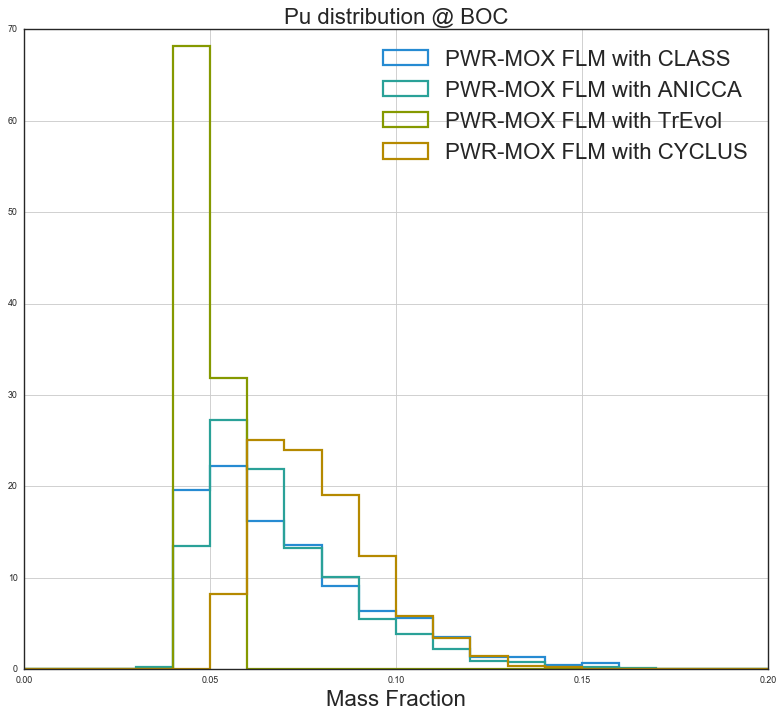

In [36]:
bins = [20, 20, 20, 20]
plot_pu_boc(M_FLM_BOC_FPu, bins=bins, labels=codes, range=(0,0.20))

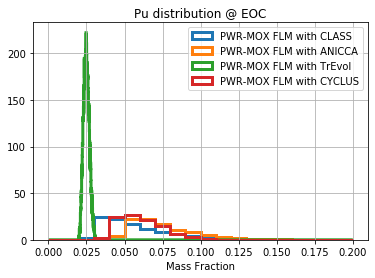

In [128]:
bins = [20, 20, 2000, 20]
plot_pu_boc(M_FLM_EOC_FPu, bins=bins, labels=codes, title_label='Pu distribution @ EOC', range=(0,0.20))


=> <span style="color:red"> Why ANICCA has so small Pu consumption....?? </span>

=> <span style="color:red"> Why TrEvol is so focused around 5% ? </span>

## 1.3 Mean value estimators

In [129]:
for code in codes:
    print_means(code)



Pu BOC CLASS FLM =  0.07049648239165257
Pu EOC CLASS FLM =  0.05595336212372836
Pu BOC CLASS FF =  0.07000000000000003
Pu EOC CLASS FF =  0.055125920302501456


Pu BOC ANICCA FLM =  0.0647311
Pu EOC ANICCA FLM =  0.0758772
Pu BOC ANICCA FF =  0.0771998
Pu EOC ANICCA FF =  0.0649438


Pu BOC TrEvol FLM =  0.048649442486544105
Pu EOC TrEvol FLM =  0.024966759008538467
Pu BOC TrEvol FF =  0.04833068119853844
Pu EOC TrEvol FF =  0.024761294109127738


Pu BOC CYCLUS FLM =  0.07940937971962646
Pu EOC CYCLUS FLM =  0.06165874819625318
Pu BOC CYCLUS FF =  0.07806999999999999
Pu EOC CYCLUS FF =  0.060308749917782296




<span style="color:red"> WTF?? ANICCA EOC Pu fraction is higher than BOC ??</span>

## 1.4 Plotting estimator 1

Estimator 1 is calculated from the Pu fraction @ B.O.C. for each run *i*: 

$F(Pu_i) = \frac{Pu_i^{BOC}}{M_{HN}}$

With $M_{HN}$ the initial heavy mass. The estimator 1 is then calculated as : 

$\delta F(Pu_i) = \frac{F_{FLM}(Pu_i) - F_{FF}(Pu_i)}{F_{FF}(Pu_i)}$

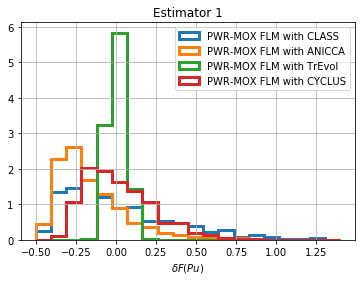

In [130]:
bins = [20, 20, 20, 20]
plot_pu_boc(ESTIMATOR_1, bins=bins, labels=codes, title_label='Estimator 1', x_label='$\delta F(Pu)$', range=(-0.5,1.4))


## 1.5 Plotting Estimator 2

The second estimator is related to the relative slope of the reactor evolution. Let's define :

$\frac{\Delta M}{M}(Pu_i) = \frac{M^{BOC}(Pu_i) - M^{EOC}(Pu_i)}{M^{BOC}(Pu_i)}$

The estimateur 2 is then the relative difference of this observable : 

$\delta \frac{\Delta M}{M}(Pu_i) = \frac{\frac{\Delta M}{M}(Pu_i)_{FLM} - \frac{\Delta M}{M}(Pu_i)_{FF}}{\frac{\Delta M}{M}(Pu_i)_{FF}}$

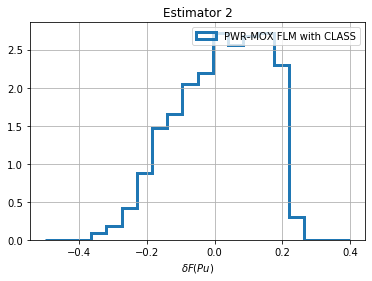

In [137]:
bins = [20, 20, 20, 20]
codes =['CLASS']
plot_pu_boc(ESTIMATOR_2, bins=bins, labels=codes, title_label='Estimator 2', x_label='$\delta F(Pu)$', range=(-0.5,0.4))

In [111]:
MPu_FLM_CLASS = (M_CLASS_FLM[:,5] - M_CLASS_FLM[:,6])/(M_CLASS_FLM[:,5])
MPu_FF_CLASS = (M_CLASS_FF[:,5] - M_CLASS_FF[:,6])/(M_CLASS_FF[:,5])

est_2_CLASS = (MPu_FLM_CLASS - MPu_FF_CLASS)/(MPu_FF_CLASS)

MPu_FLM_ANICCA = (M_ANICCA_FLM_BOC[:,2] - M_ANICCA_FLM_EOC[:,2])/M_ANICCA_FLM_BOC[:,2]
MPu_FF_ANICCA = (M_ANICCA_FF_BOC[:,2] - M_ANICCA_FF_EOC[:,2])/M_ANICCA_FF_BOC[:,2]

est_2_ANICCA = (MPu_FLM_ANICCA - MPu_FF_ANICCA)/(MPu_FF_ANICCA)


plt.figure(3)
plt.grid(True)
plt.title('Estimator 1')
plt.xlabel('$\delta F(Pu)$')
plt.ylabel('Number of Occurences')
plt.hist(est_1_CLASS,bins=20,range=(-0.5,0.4),histtype='step',lw=2,color='blue',label='Est. 2 with CLASS')
plt.hist(est_1_ANICCA,bins=20,range=(-0.5,0.4),histtype='step',lw=2,color='red',label='Est. 2 with ANICCA')
plt.legend(loc='upper right')

NameError: name 'M_CLASS_FLM' is not defined

## 1.5 Plotting Estimator 3

The third estimator is related to the absolute slope of the reactor evolution. we define :

$\frac{\Delta M}{\Delta t}(Pu_i) = \frac{M^{BOC}(Pu_i) - M^{EOC}(Pu_i)}{\Delta t}$

The estimateur 3 is then the relative difference of this observable : 

$\delta \frac{\Delta M}{\Delta t}(Pu_i) = \frac{\frac{\Delta M}{\Delta t}(Pu_i)_{FLM} - \frac{\Delta M}{\Delta t}(Pu_i)_{FF}}{\frac{\Delta M}{\Delta t}(Pu_i)_{FF}}$

-2.0165289256198355 -0.16601382287912836


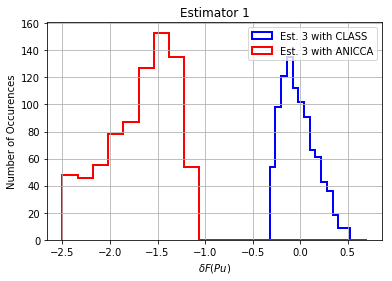

In [13]:
MPu_FLM_CLASS = (M_CLASS_FLM[:,5] - M_CLASS_FLM[:,6])/(PWR_CLASS_CT)
MPu_FF_CLASS = (M_CLASS_FF[:,5] - M_CLASS_FF[:,6])/(PWR_CLASS_CT)

est_3_CLASS = (MPu_FLM_CLASS - MPu_FF_CLASS)/(MPu_FF_CLASS)

MPu_FLM_ANICCA = (M_ANICCA_FLM_BOC[:,2] - M_ANICCA_FLM_EOC[:,2])/PWR_ANICCA_CT
MPu_FF_ANICCA = (M_ANICCA_FF_BOC[:,2] - M_ANICCA_FF_EOC[:,2])/PWR_ANICCA_CT

est_3_ANICCA = (MPu_FLM_ANICCA - MPu_FF_ANICCA)/(MPu_FF_ANICCA)

print(est_3_ANICCA[0], est_3_CLASS[0])

plt.figure(4)
plt.grid(True)
plt.title('Estimator 1')
plt.xlabel('$\delta F(Pu)$')
plt.ylabel('Number of Occurences')
plt.hist(est_3_CLASS,bins=20,range=(-0.5,0.7),histtype='step',lw=2,color='blue',label='Est. 3 with CLASS')
plt.hist(est_3_ANICCA,bins=20,range=(-2.5,0.7),histtype='step',lw=2,color='red',label='Est. 3 with ANICCA')
plt.legend(loc='upper right')

In [44]:
help(np.loadtxt)

Help on function loadtxt in module numpy.lib.npyio:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes')
    Load data from a text file.
    
    Each row in the text file must have the same number of values.
    
    Parameters
    ----------
    fname : file, str, or pathlib.Path
        File, filename, or generator to read.  If the filename extension is
        ``.gz`` or ``.bz2``, the file is first decompressed. Note that
        generators should return byte strings for Python 3k.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
    comments : str or sequence of str, optional
       